In [2]:
import pickle

homeDir = 'P:\\PW-WATER SERVICES\\TECHNICAL SERVICES\\Anna'
pickleLocation = homeDir + '\\2018\\Python Objects\\'

In [3]:
with open(pickleLocation + 'flowDict.pickle', 'rb') as handle:
    flowDict = pickle.load(handle)


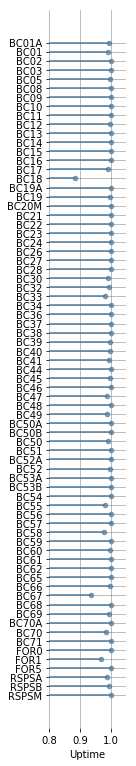

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

col = 'Q (MGD)'

percentRunning = []
for fm in flowDict:
    df = flowDict[fm]
    percentRunning.append((len(flowDict[fm].index) 
                        - sum(np.isnan(flowDict[fm][col].values)))
                     /len(flowDict[fm].index))

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

#plt.xticks(range(0,len(newDF.index)))
y = range(0,4 * len(percentRunning),4)
leftLim = round(0.9 * min(percentRunning),1)
xticks = list(np.arange(leftLim,1,0.1))
xticks.append(1)
fig, ax = plt.subplots(figsize=(2,10.75))
ax.plot(percentRunning,
       y,
        marker = '.',
        markersize = 9,
        linewidth = 0,
        alpha = 0.7,
       color = 'xkcd:stormy blue')
for xval, yval in zip(percentRunning, y):
    ax.plot([0, xval],[yval, yval],
           color = 'xkcd:stormy blue')
plt.xticks(
    ticks = xticks)
plt.yticks(
    ticks = y, 
    labels = list(flowDict.keys()))
ax.xaxis.grid(True, 
            linestyle = '-',
            which = 'major',
            color = 'xkcd:charcoal',
            alpha = 0.4)
ax.yaxis.grid(True, 
            linestyle = '-',
            which = 'major',
            color = 'xkcd:charcoal',
            alpha = 0.4)
ax.set_xlim(left = leftLim)
ax.invert_yaxis()
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Uptime')
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

def findDiameter(filename, fmname):
    df = pd.read_csv(filename,
        index_col=0,
        sep='\t')
    diameter = df.loc[fmname,'Diameter']
    return(diameter)

homeDir = 'P:\\PW-WATER SERVICES\\TECHNICAL SERVICES\\Anna'
fmdataFile = homeDir + '\\FMdata.csv'
dfDetails = pd.read_csv(
    fmdataFile,
    index_col=0,
    dtype = {
            'Flow Monitor' : 'object',
            'Rain Gage' : 'object',
            'Diameter' : np.float64,
            'Linear Feet' : np.float64,
            'Basin Area (Ac)' : np.float64,
            'Bassin Footprint (in-mi)' : np.float64,
            'Total Footage (LF)' : np.float64
        })
dfDetails[dfDetails==9999.0] = float('NaN')
dfDetails.head()

,Rain Gage,Diameter,Linear Feet,Basin Area (Ac),Basin Footprint (in-mi),Total Footage (LF)
Flow Monitor,,,,,,
BC01,BCRG01,42.00,127586.0,1369.06,153.97,56611.0
BC01A,BCRG02,26.88,NaN,NaN,57.28,19959.0
BC02,BCRG01,8.25,NaN,265.30,33.79,22305.0
BC03,BCRG01,15.00,NaN,548.54,85.21,52062.0
BC05,BCRG01,7.75,NaN,1037.10,129.48,85344.0


In [58]:
fmname = 'BC32'
diameter = dfDetails.loc[fmname,'Diameter']
df = flowDict[fmname]

depth = np.linspace(0.001, diameter, 50)

In [59]:
th = 2 * np.arccos(1 - 2 * depth / diameter)
A = (diameter ** 2 / 8) * (th - np.sin(th))
B = diameter * np.sin(th / 2)
dh = A / B

g = 32.2 * 12 #in/s^2
Fr = 1
vFr = Fr * np.sqrt(g * dh) / 12

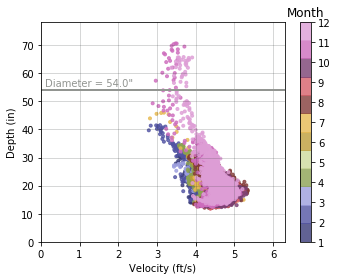

In [111]:
fmname = 'BC19A'
diameter = dfDetails.loc[fmname,'Diameter']
df = flowDict[fmname]

cv = np.linspace(
    df.index[0].month,
    df.index[-1].month,
    len(df.index))
fig, ax = plt.subplots(figsize=(5,4))
plt.scatter(
    df['v (ft/s)'].values,
    df['y (in)'].values,
    marker = '.',
    alpha = 0.8,
    c = cv,
    cmap = matplotlib.cm.get_cmap(
        name = 'tab20b',
        lut = list(set(df.index.month))[-1]
                - list(set(df.index.month))[0] + 1))
rightLim = np.ceil(df['v (ft/s)'].max())
topLim = np.ceil(max(df['y (in)'].max(), diameter))
ax.set_ylim(
    top = 1.1 * topLim,
    bottom = 0)
ax.set_xlim(
    left = 0,
    right = 1.05 * rightLim)
cb = plt.colorbar(
    ticks = list(set(df.index.month)))
cb.ax.set_title('Month')
# plot diameter
ax.plot(
    [0, 1.1 * rightLim],
    [diameter, diameter],
    linewidth = 2.0,
    linestyle = '-',
    color = 'xkcd:grey')
# CRITICAL FROUDE NO. LINE
#ax.plot(
#    vFr,
#    dh,
#    linewidth = 2.0,
#    linestyle = ':',
#    color = 'xkcd:charcoal')
ax.text(0.1, diameter + 0.02 * topLim, 
        s = 'Diameter = ' + str(diameter) + '"',
       color = 'xkcd:grey')
ax.set_xlabel('Velocity (ft/s)')
ax.set_ylabel('Depth (in)')
ax.xaxis.grid(
        True, 
        linestyle = '-',
        which = 'major',
        color = 'xkcd:charcoal',
        alpha = 0.25)
ax.yaxis.grid(
        True, 
        linestyle = '-',
        which = 'major',
        color = 'xkcd:charcoal',
        alpha = 0.25)
plt.tight_layout()

In [66]:
2 / (1.1 * topLim)

0.025608194622279125

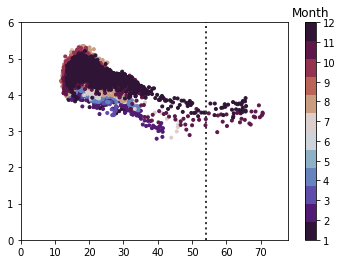

In [276]:
fmname = 'BC30'
diameter = dfDetails.loc[fmname,'Diameter']
df = flowDict[fmname]
cv = np.linspace(
    df.index[0].month,
    df.index[-1].month,
    len(df.index))
fig, ax = plt.subplots()
plt.scatter(
    df['y (in)'].values,
    df['v (ft/s)'].values,
    marker = '.',
    alpha = 1,
    c = cv,
    cmap = matplotlib.cm.get_cmap(
        name = 'twilight_shifted',
        lut = list(set(df.index.month))[-1]
                - list(set(df.index.month))[0] + 1))
ax.set_xlim(
    right = 1.1 * np.ceil(df['y (in)'].max()),
    left = 0)
ax.set_ylim(
    bottom = 0,
    top = np.ceil(df['v (ft/s)'].max()))
cb = plt.colorbar(
    ticks = list(set(df.index.month)))
cb.ax.set_title('Month')
# plot diameter
ax.plot(
    [diameter, diameter],
    [0, np.ceil(df['v (ft/s)'].max())],
    linewidth = 2.0,
    linestyle = ':',
    color = 'xkcd:charcoal')

In [106]:
fmname = 'BC19A'
df = flowDict[fmname]
depth = df['y (in)'].values
dmin = df['y (in)'].min()
diameter = dfDetails.loc[fmname,'Diameter']

# initialize
ddog = 0
th = 2 * np.arccos(1 - 2 * df['y (in)'].values / diameter)
A = (diameter ** 2 / 8) * (th - np.sin(th))
P = diameter * th / 2

11.84